## Overview

Understanding the cost of living is crucial for various stakeholders, from businesses making relocation decisions to individuals considering moves abroad. This analysis explores the Cost of Living Index and its related indices, which measure the relative cost of living across countries compared to New York City (NYC), serving as the baseline (100%). The data provides valuable insights into the prices of consumer goods, rent, groceries, restaurant prices, and local purchasing power in different countries, offering a comprehensive understanding of how living expenses vary globally.

This analysis leverages a dataset from Kaggle, which contains the 2024 cost of living data for countries worldwide. The goal of this study is to identify cost patterns, help expatriates plan financially, assist businesses in making informed decisions, and provide investors with insights into potential opportunities in real estate or businesses in countries with varying living costs.


### Understanding  Cost of Living 

The cost of living indices provided on this website are relative to New York City (NYC), with a baseline index of 100% for NYC.

Here's a breakdown of each index and its meaning:

Cost of Living Index (Excl. Rent): This index indicates the relative prices of consumer goods like groceries, restaurants, transportation, and utilities. It excludes accommodation expenses such as rent or mortgage. For instance, a city with a Cost of Living Index of 120 is estimated to be 20% more expensive than New York City (excluding rent).

Rent Index: This index estimates the prices of renting apartments in a city compared to New York City. If the Rent Index is 80, it suggests that the average rental prices in that city are approximately 20% lower than those in New York City.

Cost of Living Plus Rent Index: This index estimates consumer goods prices, including rent, in comparison to New York City.
Groceries Index: This index provides an estimation of grocery prices in a city relative to New York City. Numbeo uses item weights from the "Markets" section to calculate this index for each city.

Restaurants Index: This index compares the prices of meals and drinks in restaurants and bars to those in NYC.

Local Purchasing Power: This index indicates the relative purchasing power in a given city based on the average net salary. A domestic purchasing power of 40 means that residents with an average salary can afford, on average, 60% less goods and services compared to residents of New York City with an average salary.

Link to the dataset: https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024/data?select=Cost_of_Living_Index_by_Country_2024.csv

The aim of this analysis is to assess the global cost of living across various countries, identifying key factors influencing the cost of living and their relationships with economic indicators such as rent, groceries, and local purchasing power. This will help us understand the disparities in living standards and make informed decisions on budgeting, relocation, investment, and policy-making.

#### (A) Analyze the distribution of cost of living indices:

Explore the distribution of the Cost of Living Index, Rent Index, Groceries Index, Restaurant Price Index, and Local Purchasing Power Index across different countries.
Identify the range and variations within these indices to understand global disparities in living costs.

#### (B) Identify top and bottom countries by index:

Rank countries with the highest and lowest cost of living, rent, groceries, and other indices.
Create bar charts to visually represent the top 5 and bottom 5 countries for each index, providing insights into the most and least expensive countries for various expenses.

#### (C) Examine relationships between indices:

Use scatter plots to visualize and analyze the relationships between different indices, such as:
Cost of Living Index vs. Rent Index
Cost of Living Index vs. Groceries Index
Rent Index vs. Local Purchasing Power Index

#### (D) Identify correlations to understand how different factors interact with one another and how they collectively influence the overall cost of living.

#### Highlight key global trends

Draw conclusions on global trends in living standards, such as whether high rent is typically associated with high costs of groceries or if local purchasing power can offset higher living expenses.
Use these trends to offer insights into the economic environments of various regions.


## Import Libraries

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")


In [58]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
#Load dataset
Cost_of_living = pd.read_csv('Cost_of_Living_Index_by_Country_2024.csv')
Cost_of_living

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [4]:
#preview the dataset
Cost_of_living.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [5]:
Cost_of_living.tail()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1


In [7]:
#.info() function is used to understand the data types, numbers of columns, number of rows and memory storage of the data.
Cost_of_living.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


In [8]:
#Summary statistics of  the dataset
Cost_of_living.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


Cost of Living Index ranges from 18.8 to 101.1.
Rent Index ranges from 2.4 to 67.2
Local Purchasing Power Index ranges from 2.3 to 182.5, showing considerable variation.

In [9]:
#lets get the shape of the dataset
Cost_of_living.shape

(121, 8)

In [10]:
#Check for columns label i.e listing all columns names
Cost_of_living.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

### Renaming the Columns

In [14]:
Cost_of_living.rename(columns={
    'Cost of Living Index': 'Cost_of_Living_Index', 'Rent Index':'Rent_Index',
    'Cost of Living Plus Rent Index': 'Cost_of_Living_Plus_Rent_Index',
    'Groceries Index': 'Groceries_Index',
    'Restaurant Price Index': 'Restaurant_Price_Index',
    'Local Purchasing Power Index': 'Local_Purchasing_Power_Index'
}, inplace=True)


In [15]:
#Let call out the data set after renaming it. 
Cost_of_living

,Rank,Country,Cost_of_Living_Index,Rent_Index,Cost_of_Living_Plus_Rent_Index,Groceries_Index,Restaurant_Price_Index,Local_Purchasing_Power_Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


### Dropping duplicates


In [19]:
# Check for duplicate rows
print(Cost_of_living.duplicated().sum())

0


In [16]:
#Checking if there is duplicate values
Cost_of_living.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Length: 121, dtype: bool

No duplicate rows are found.

### Remove Null values


In [18]:
# Check for missing values
print(Cost_of_living.isnull().sum())


Rank                              0
Country                           0
Cost_of_Living_Index              0
Rent_Index                        0
Cost_of_Living_Plus_Rent_Index    0
Groceries_Index                   0
Restaurant_Price_Index            0
Local_Purchasing_Power_Index      0
dtype: int64


None of the columns have missing values

In [17]:
Cost_of_living.isna()

,Rank,Country,Cost_of_Living_Index,Rent_Index,Cost_of_Living_Plus_Rent_Index,Groceries_Index,Restaurant_Price_Index,Local_Purchasing_Power_Index
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
116,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False
119,False,False,False,False,False,False,False,False


### Exploratory Data Analysis

### Visualizing the Data

Creating histograms for each index to see their distribution.

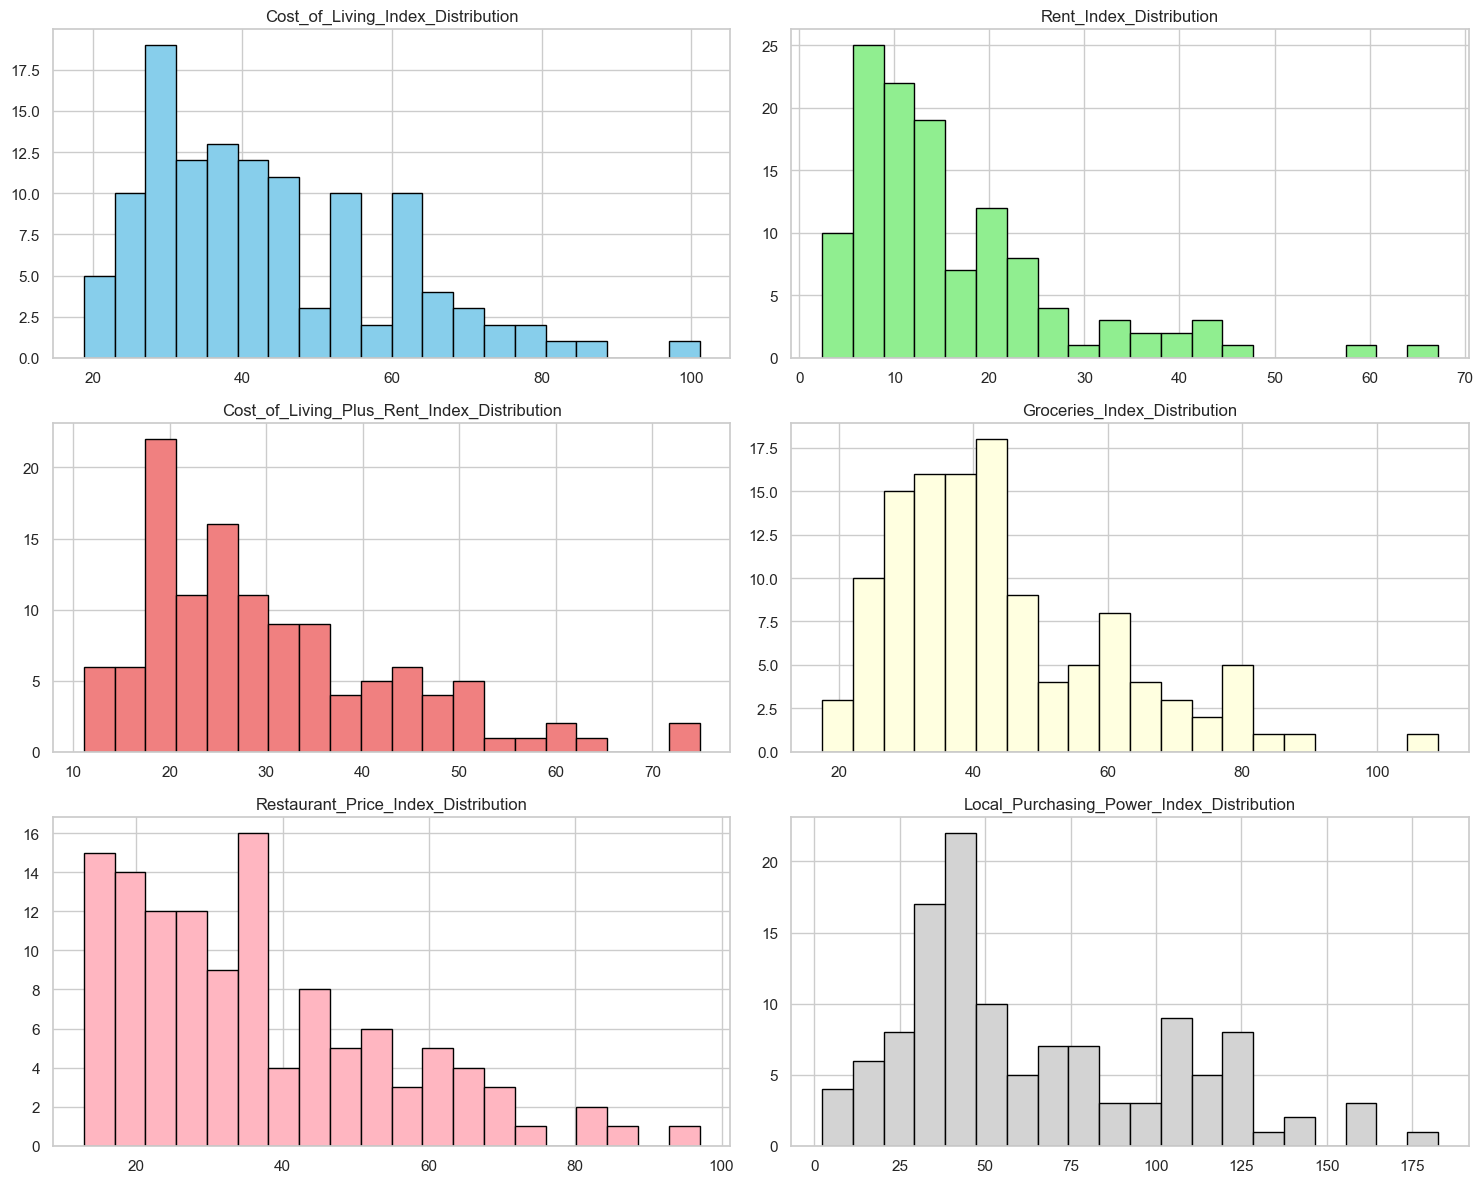

In [20]:
# Set the style for seaborn
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
Cost_of_living['Cost_of_Living_Index'].hist(ax=axes[0, 0], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Cost_of_Living_Index_Distribution')

Cost_of_living['Rent_Index'].hist(ax=axes[0, 1], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Rent_Index_Distribution')

Cost_of_living['Cost_of_Living_Plus_Rent_Index'].hist(ax=axes[1, 0], bins=20, color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Cost_of_Living_Plus_Rent_Index_Distribution')

Cost_of_living['Groceries_Index'].hist(ax=axes[1, 1], bins=20, color='lightyellow', edgecolor='black')
axes[1, 1].set_title('Groceries_Index_Distribution')

Cost_of_living['Restaurant_Price_Index'].hist(ax=axes[2, 0], bins=20, color='lightpink', edgecolor='black')
axes[2, 0].set_title('Restaurant_Price_Index_Distribution')

Cost_of_living['Local_Purchasing_Power_Index'].hist(ax=axes[2, 1], bins=20, color='lightgray', edgecolor='black')
axes[2, 1].set_title('Local_Purchasing_Power_Index_Distribution')

plt.tight_layout()
plt.show()




### 1.Cost of Living Index Distribution:

The distribution is skewed to the right, indicating that most countries have a cost of living index between 20 and 50.
Only a few countries have a cost of living index higher than 80, suggesting that these are exceptional cases, possibly high-income nations or regions with high living standards.

### 2. Rent Index Distribution:

The Rent Index also shows a right-skewed distribution with most countries having rent indices below 30.
This suggests that affordable rent is common across many countries, but there are outliers where rent costs are significantly higher (indices above 50).

### 3. Cost of Living Plus Rent Index Distribution:

The combined index for cost of living and rent also displays a right-skewed pattern, similar to the individual indices.
Most countries fall below an index of 50, with a notable concentration around 20-30. This could mean that combining rent and general living costs, the overall expense remains moderate for most countries.

### 4. Groceries Index Distribution:

This index shows a relatively symmetrical distribution centered around 40.
A smaller number of countries have indices higher than 60 or lower than 20, indicating that grocery costs are moderately consistent across different regions with fewer extreme values.

### 5. Restaurant Price Index Distribution:

The distribution for the Restaurant Price Index is more spread out, with a concentration around 20-40.
Some countries have much higher indices, indicating that dining out is considerably more expensive in those regions compared to 
others.

### 6. Local Purchasing Power Index Distribution:

This distribution shows that most countries have a purchasing power index between 25 and 75, with a significant number clustering around 50.
A few countries have much higher purchasing power indices (above 100), suggesting that local wages and economic power are relatively higher in those places, which could be developed nations.

### Overall Observations:
The general trend across all indices shows a right-skewed distribution, with most countries falling into moderate cost and rent categories.
High indices in each category appear to be outliers, suggesting that there are specific countries or cities known for higher living costs.
The local purchasing power index suggests variability in economic strength across different regions, with a few countries having high economic power.

###  Scatter Plots for Index Pairs

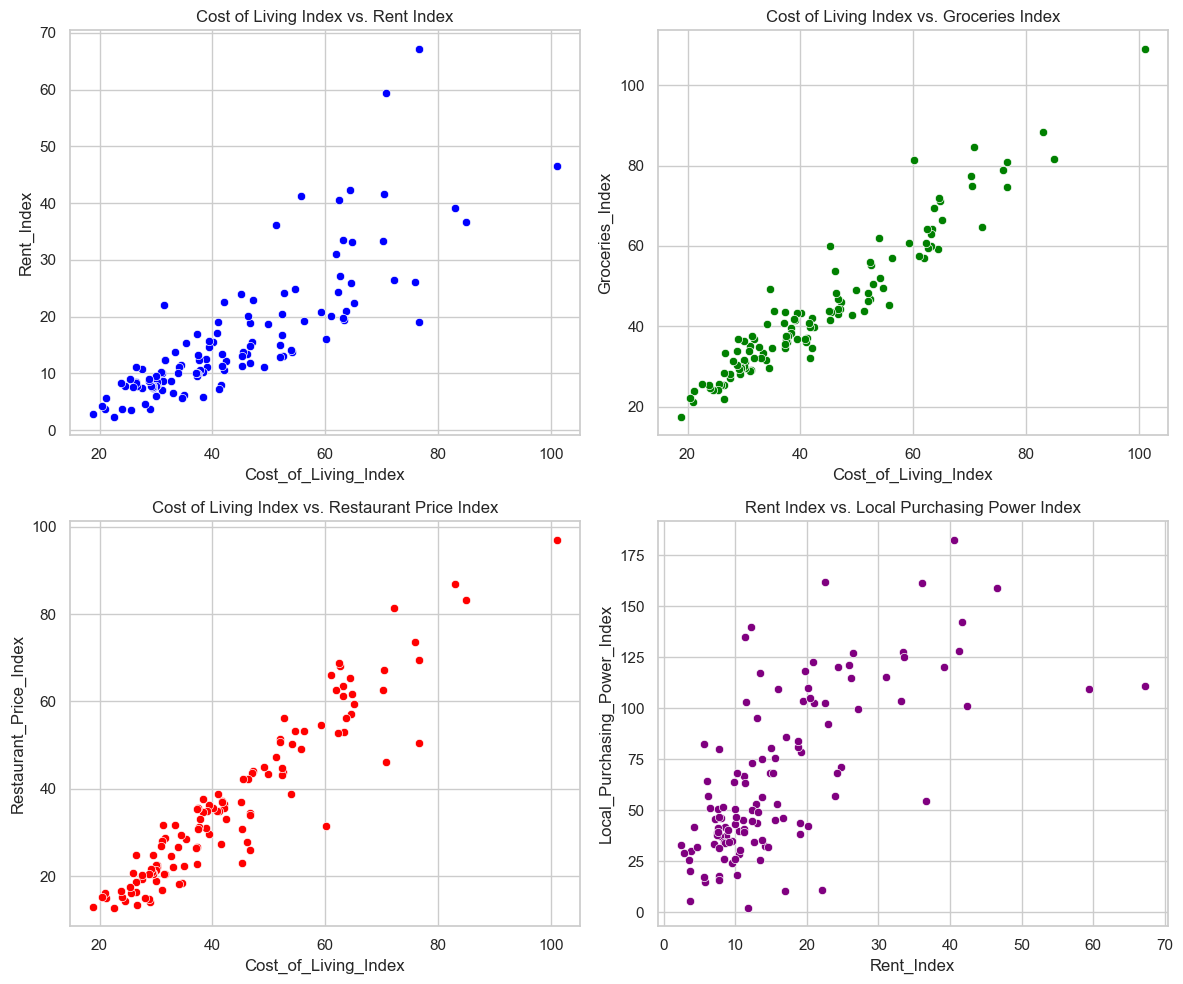

In [22]:
# Set the style for seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(12, 10))

# Cost of Living Index vs. Rent Index
plt.subplot(2, 2, 1)
sns.scatterplot(data= Cost_of_living, x='Cost_of_Living_Index', y='Rent_Index', color='blue')
plt.title('Cost of Living Index vs. Rent Index')

# Cost of Living Index vs. Groceries Index
plt.subplot(2, 2, 2)
sns.scatterplot(data= Cost_of_living, x='Cost_of_Living_Index', y='Groceries_Index', color='green')
plt.title('Cost of Living Index vs. Groceries Index')

# Cost of Living Index vs. Restaurant Price Index
plt.subplot(2, 2, 3)
sns.scatterplot(data= Cost_of_living, x='Cost_of_Living_Index', y='Restaurant_Price_Index', color='red')
plt.title('Cost of Living Index vs. Restaurant Price Index')

# Rent Index vs. Local Purchasing Power Index
plt.subplot(2, 2, 4)
sns.scatterplot(data= Cost_of_living, x='Rent_Index', y='Local_Purchasing_Power_Index', color='purple')
plt.title('Rent Index vs. Local Purchasing Power Index')

plt.tight_layout()
plt.show()

Insights from the scatter plots:

Cost of Living Index vs. Rent Index:
There is a positive correlation between the Cost of Living Index and the Rent Index. As the Cost of Living Index increases, the Rent Index tends to increase as well. This suggests that in countries where the general cost of living is higher, rent prices are also likely to be higher.

Cost of Living Index vs. Groceries Index:
Similarly, there's a strong positive correlation between the Cost of Living Index and the Groceries Index. This indicates that in countries where the cost of living is high, groceries are also more expensive.

Cost of Living Index vs. Restaurant Price Index:
The strong positive correlation here suggests that in countries with a high cost of living, eating out at restaurants is also more expensive. This is consistent with the previous correlations observed with rent and groceries.

Rent Index vs. Local Purchasing Power Index:
The relationship here is less straightforward. While there’s some clustering that might suggest a mild positive correlation, there are outliers indicating that even in places with lower rent, local purchasing power can vary significantly. This could imply that in some countries, despite lower rents, people might still have a relatively high purchasing power due to factors like higher wages or lower overall living expenses.

Overall, the scatter plots reinforce the idea that cost indices are generally correlated, meaning that in countries where one aspect of living is expensive, others tend to be as well. However, the relationship between rent and purchasing power is more complex and may be influenced by other factors not captured by these indices.

### Comparing Specific Countries with Highest and Lowest Index
Identify the top 5 and bottom 5 countries for each index.

In [29]:
# Comparing Countries

highest_cost_of_living = Cost_of_living[['Country', 'Cost_of_Living_Index']].sort_values(by='Cost_of_Living_Index', ascending=False).head(5)
lowest_cost_of_living = Cost_of_living[['Country', 'Cost_of_Living_Index']].sort_values(by='Cost_of_Living_Index', ascending=True).head(5)

highest_rent_index = Cost_of_living[['Country', 'Rent_Index']].sort_values(by='Rent_Index', ascending=False).head(5)
lowest_rent_index =  Cost_of_living[['Country', 'Rent_Index']].sort_values(by='Rent_Index', ascending=True).head(5)

print("Top 5 Countries with Highest Cost of Living Index:")
print(highest_cost_of_living)
print("\nTop 5 Countries with Lowest Cost of Living Index:")
print(lowest_cost_of_living)
print("\nTop 5 Countries with Highest Rent Index:")
print(highest_rent_index)
print("\nTop 5 Countries with Lowest Rent Index:")
print(lowest_rent_index)

Top 5 Countries with Highest Cost of Living Index:
       Country  Cost_of_Living_Index
0  Switzerland                 101.1
1      Bahamas                  85.0
2      Iceland                  83.0
3    Singapore                  76.7
4     Barbados                  76.6

Top 5 Countries with Lowest Cost of Living Index:
        Country  Cost_of_Living_Index
120    Pakistan                  18.8
119       Libya                  20.4
118       Egypt                  21.0
117       India                  21.2
116  Bangladesh                  22.5

Top 5 Countries with Highest Rent Index:
              Country  Rent_Index
3           Singapore        67.2
7   Hong Kong (China)        59.4
0         Switzerland        46.5
13            Ireland        42.3
8       United States        41.7

Top 5 Countries with Lowest Rent Index:
        Country  Rent_Index
116  Bangladesh         2.4
120    Pakistan         2.8
111       Nepal         3.5
118       Egypt         3.7
114       Syria      

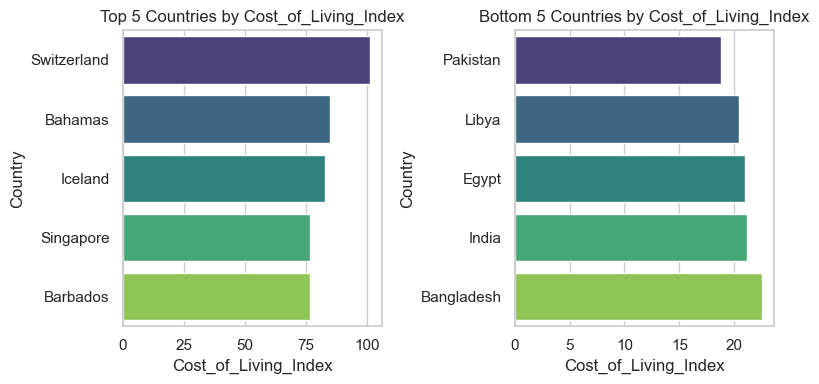

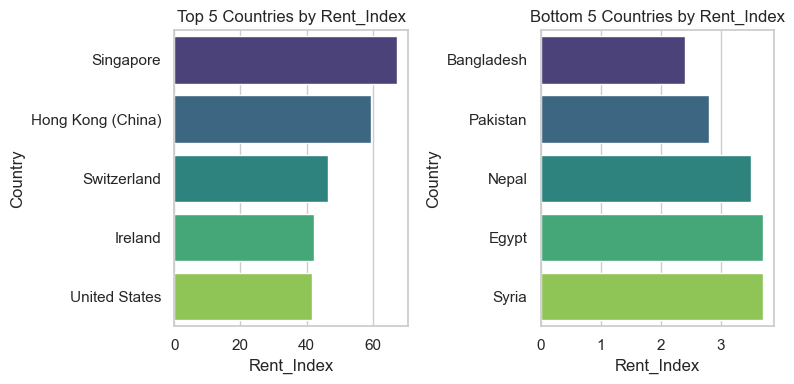

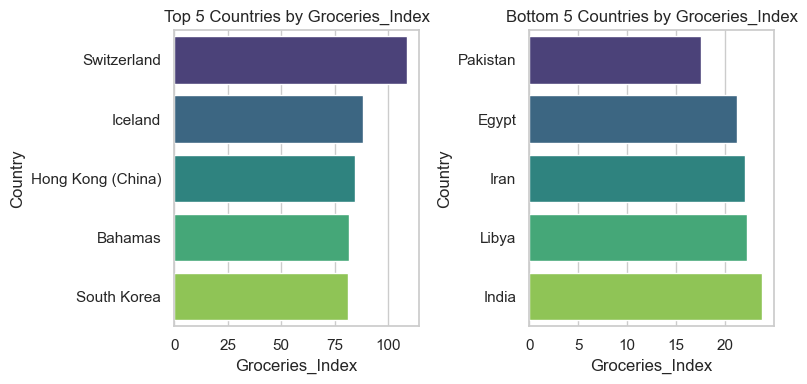

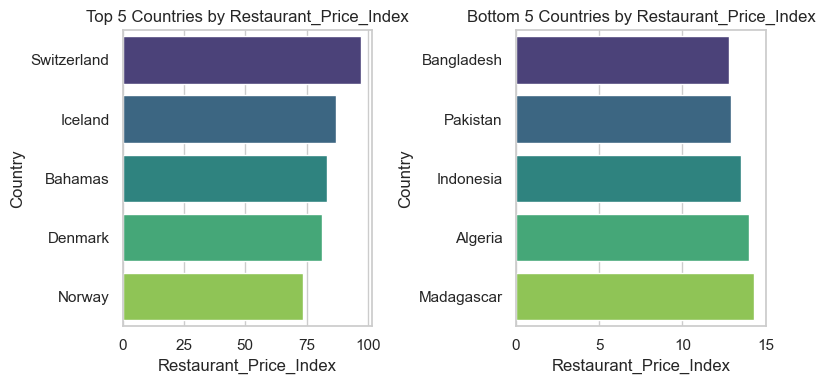

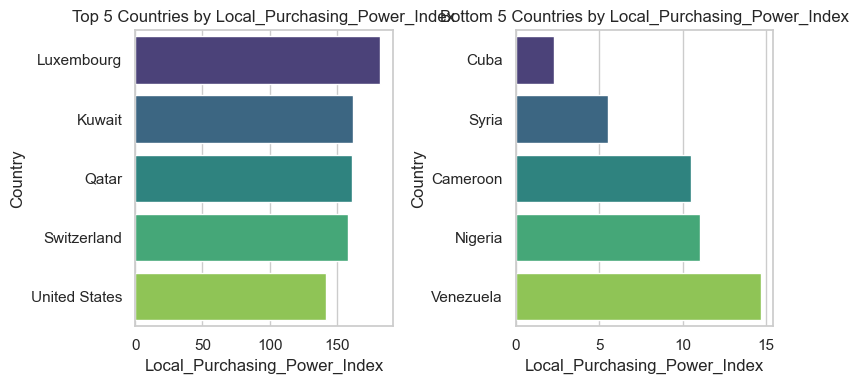

In [25]:

def plot_top_bottom(Cost_of_living, column, title):
    top5 = Cost_of_living[['Country', column]].sort_values(by=column, ascending=False).head(5)
    bottom5 = Cost_of_living[['Country', column]].sort_values(by=column, ascending=True).head(5)
    
    plt.figure(figsize=(8, 4))
    
    # Top 5 countries
    plt.subplot(1, 2, 1)
    sns.barplot(data=top5, x=column, y='Country', palette='viridis')
    plt.title(f'Top 5 Countries by {title}')
    
    # Bottom 5 countries
    plt.subplot(1, 2, 2)
    sns.barplot(data=bottom5, x=column, y='Country', palette='viridis')
    plt.title(f'Bottom 5 Countries by {title}')
    
    plt.tight_layout()
    plt.show()

# Plot bar charts for each index
plot_top_bottom(Cost_of_living, 'Cost_of_Living_Index', 'Cost_of_Living_Index')
plot_top_bottom(Cost_of_living, 'Rent_Index', 'Rent_Index')
plot_top_bottom(Cost_of_living, 'Groceries_Index', 'Groceries_Index')
plot_top_bottom(Cost_of_living, 'Restaurant_Price_Index', 'Restaurant_Price_Index')
plot_top_bottom(Cost_of_living, 'Local_Purchasing_Power_Index', 'Local_Purchasing_Power_Index')

### 1. Cost of Living Index

The countries with the highest Cost of Living Index are Switzerland, Bahamas, Iceland, Singapore, and Barbados. These countries have a higher overall cost of living, indicating that goods and services are generally more expensive.
While Pakistan, Libya, Egypt, India, and Bangladesh have the lowest Cost of Living Index. These countries are relatively more affordable in terms of general living costs.
Countries like Switzerland and the Bahamas have a significantly higher cost of living compared to countries like Pakistan and Bangladesh. This could be due to higher wages, economic factors, or the cost of imported goods and services.

### 2. Rent Index

Singapore, Hong Kong (China), Switzerland, Ireland, and the United States have the highest rent indices, meaning housing costs in these countries are particularly high.
While the countries with the lowest rent indices are Bangladesh, Pakistan, Nepal, Egypt, and Syria, where renting is much more affordable.
Rent is much more expensive in countries like Singapore and Hong Kong, where the demand for housing might outpace supply. Meanwhile, countries like Bangladesh and Pakistan are relatively inexpensive in terms of rent.

### 3. Groceries Index

Switzerland, Iceland, Hong Kong (China), Bahamas, and South Korea have the highest groceries index. This shows that food and other grocery-related goods are more expensive in these countries.
While the countries with the lowest groceries index are Pakistan, Egypt, Iran, Libya, and India, where groceries are generally cheaper.
Countries like Switzerland and Iceland have the most expensive groceries, possibly due to high import costs or a higher standard of living. Meanwhile, in countries like Pakistan and India, groceries are more affordable, likely due to lower labor costs and local production.

### 4. Restaurant Price Index
	
The top five countries with the highest restaurant price index are Switzerland, Iceland, Bahamas, Denmark, and Norway While the bottom five countries with the lowest restaurant price index are Bangladesh, Pakistan, Indonesia, Algeria, and Madagascar.
The countries with the highest restaurant prices are generally more developed, wealthy nations, while the countries with the lowest restaurant prices are less developed, possibly indicating the disparity in living costs.

### 5.Local Purchasing Power Index
The top five countries with the highest local purchasing power are Luxembourg, Kuwait, Qatar, Switzerland, and the United States While the bottom five countries with the lowest are Cuba, Syria, Cameroon, Nigeria, and Venezuela.
Higher local purchasing power means that people in these countries can buy more goods and services with their income, indicating stronger economies while the bottom countries have weaker economies where incomes don’t go as far in purchasing goods and services.
	

Developed countries tend to have higher costs of living because of economic strength, higher wages, and greater demand for housing, groceries, and services. However, the high cost of living is often offset by higher wages, particularly in countries with strong purchasing power, such as Switzerland and the United States.

While living costs are much lower in developing nations, this is often a reflection of weaker economies and lower wages. People in these countries have lower purchasing power, which limits the affordability of goods and services relative to their incomes.
Rent prices are a strong indicator of housing demand and urban development. Countries with booming urban centers and limited land face higher rent costs, while more rural or less densely populated nations tend to have lower rent costs.

Groceries and restaurant prices are heavily influenced by a country’s ability to produce goods locally versus reliance on imports. Developed nations that rely on imports for food and goods, like Switzerland, see higher costs, while developing countries benefit from cheaper locally produced goods.

Local purchasing power is a critical indicator of the overall economic health and well-being of a nation’s residents. Countries with higher purchasing power can afford a higher cost of living, while those with lower purchasing power struggle despite lower prices.

While the cost of living is low, it is important to note that wages and local purchasing power are also much lower, meaning that people in these countries may still find it difficult to afford even these lower costs.

Countries with lower rent indices have lower real estate demand, which keeps housing costs low, but this is often tied to the slower economic development and lower overall wealth of the population.

While food is more affordable in these nations, it reflects the broader economic context of low wages and limited imports. This makes the cost of living cheaper for local residents but also reflects the economic struggles in these regions.

Dining out is affordable, reflecting both local wages and the lower demand for luxury dining options. This aligns with the broader affordability of living costs in these countries.

Low purchasing power in these countries reflects their weak economic health, inflation, and low incomes. While goods and services may be affordable in nominal terms, most residents still struggle to afford basic necessities due to insufficient wages.

While living costs are lower in countries with weaker economies, this is often a reflection of lower wages and less purchasing power, meaning residents in these nations may still face challenges in meeting basic needs.
Many of these countries benefit from lower costs due to local production of goods, limited urbanization, and less demand for high-cost housing or services, which keeps indices like groceries and rent low.
Some countries with low purchasing power and inflation issues (e.g., Venezuela, Syria) highlight how low prices do not necessarily equate to economic stability or better living conditions.

Developed Countries: While they have a higher cost of living, stronger economies with high local purchasing power allow people to afford more despite expensive housing, food, and services. Examples include Switzerland, the United States, and Singapore.

Developing or Underdeveloped Countries: These countries have lower living costs, but incomes are also lower, leading to reduced purchasing power. While it is cheaper to live in countries like Pakistan, Bangladesh, and Egypt, the overall economic environment offers less financial flexibility to their residents.


## Potential Insights for Decision Making

### 1.For Companies

Adjusting Benefits and Compensation: Beyond salaries, companies may also adjust benefits packages to include allowances for housing, transportation, or groceries for employees moving to high-cost regions like Switzerland or Singapore. In lower-cost regions, companies might focus more on providing incentives related to quality of life rather than financial compensations.

Office Locations: Businesses considering expanding or opening new offices could use this data to choose regions with lower rent and living costs (e.g., Bangladesh, Pakistan), reducing operational expenses.

### 2. For Expatriates

Tax Considerations: In addition to higher living expenses, expatriates moving to countries with high indices (such as Switzerland or Singapore) may also need to be aware of higher tax rates or hidden costs such as health insurance, which could further affect their financial planning.

Healthcare and Education
Expats should also consider the quality and cost of healthcare and education in countries with high or low indices, as this may be an additional factor in overall living expenses.

### 3. For Investment

Real Estate Development: Investors in the real estate sector might look at countries with high rent indices (e.g., Singapore, Hong Kong) for short-term rental opportunities, while low rent index regions could offer attractive options for long-term investments due to the affordability of property.

Business Expansion: Investors might be attracted to regions with low cost of living and strong local purchasing power (e.g., Qatar, Switzerland) to develop industries or services that can thrive in areas with growing middle classes and strong economic conditions.

### 4. For Policymakers

Subsidy and Support Programs: Countries with lower indices but weaker purchasing power (e.g., Venezuela, Syria) might benefit from government interventions like subsidies or support programs to help improve the standard of living and economic conditions.

Regional Development Plans: Policymakers could use this data to identify areas where infrastructure investments or economic reforms are necessary to improve the local cost of living without compromising local affordability.

### 5. For Tourists
Budget Travel: Tourists can use the data to choose budget-friendly travel destinations, focusing on countries with lower costs for accommodations and food (e.g., Egypt, India). Meanwhile, countries with higher indices may attract luxury travelers who are willing to spend more for unique experiences.

### 6. For Economic Researchers

Global Economic Trends: Researchers could analyze the data to predict economic growth patterns or identify countries with widening wealth gaps and income inequalities based on the variances between cost of living, purchasing power, and rent indices.


### Correlation Analysis

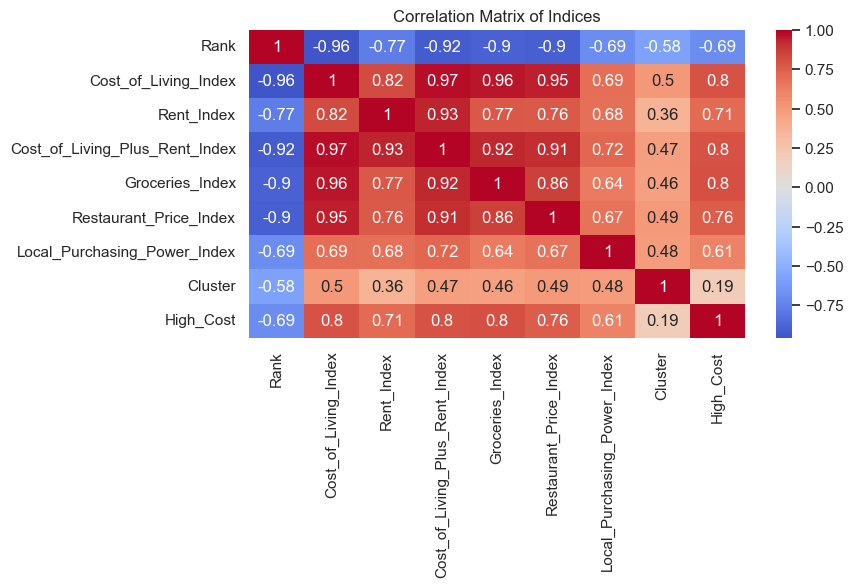

In [62]:

correlation_matrix = Cost_of_living.corr(numeric_only=True)

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Indices')
plt.show()

The heatmap shows the correlation between various indices (Cost of Living, Rent, Groceries, Restaurant Price, and Local Purchasing Power).

Cost of Living Index is highly positively correlated with Rent Index (0.82), Groceries Index (0.96), and Restaurant Price Index (0.95). This suggests that as rent, groceries, or restaurant prices increase, the overall cost of living tends to rise.
Local Purchasing Power Index is negatively correlated with all other indices, indicating that in countries where the cost of living, rent, groceries, and restaurant prices are high, the purchasing power tends to be lower.


### Linear Regression to Predict Cost of Living Index
This model predicts the Cost of Living Index using other indices like Rent Index, Groceries Index, etc.

In [33]:

# Define features (X) and target (y)
X = Cost_of_living[['Rent_Index', 'Groceries_Index', 'Restaurant_Price_Index', 'Local_Purchasing_Power_Index']]
y = Cost_of_living['Cost_of_Living_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Root Mean Squared Error: 2.8450785360579043
R² Score: 0.9737474308220023


Root Mean Squared Error (RMSE): 2.845

This value suggests that, on average, the model's predictions are off by about 2.85 units in the Cost of Living Index. Given that the index can range across large values, this indicates good accuracy.

R² Score: 0.974

The R² score of 0.9737 indicates that the model explains approximately 97.37% of the variance in the Cost of Living Index. This is a very high level of explained variance, demonstrating that the model fits the data well.

Strong Predictors: The high R² score suggests that Rent Index, Groceries Index, Restaurant Price Index, and Local Purchasing Power Index are strong predictors for the Cost of Living Index. This means that these factors are highly correlated with the overall cost of living in different countries.


### K-means Clustering to Group Countries by Cost of Living and Related Indices
This helps group the countries into clusters based on their economic indicators.

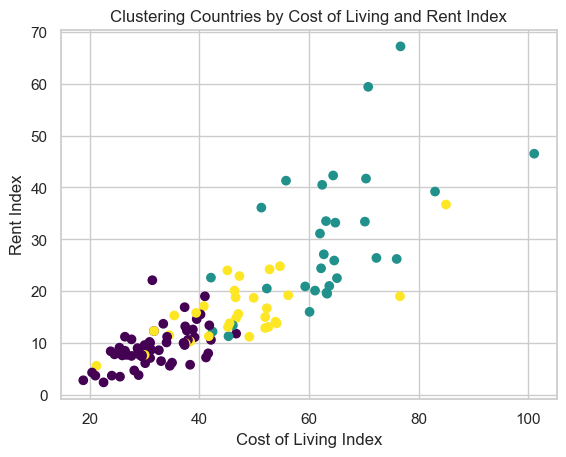

In [50]:

# Set environment variable to avoid memory leak issue
os.environ["OMP_NUM_THREADS"] = "1"

# Define features for clustering
X = Cost_of_living[['Cost_of_Living_Index', 'Rent_Index', 'Groceries_Index', 'Restaurant_Price_Index', 'Local_Purchasing_Power_Index']]

# Apply KMeans clustering with n_init explicitly set
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # 3 clusters
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataset
Cost_of_living['Cluster'] = clusters

# Visualize the clusters
plt.scatter(Cost_of_living['Cost_of_Living_Index'], Cost_of_living['Rent_Index'], c=Cost_of_living['Cluster'], cmap='viridis')
plt.xlabel('Cost of Living Index')
plt.ylabel('Rent Index')
plt.title('Clustering Countries by Cost of Living and Rent Index')
plt.show()


#### Scatter Plot Analysis (Cost of Living Index vs. Rent Index)

The scatter plot of countries by cost of living and rent index shows a positive correlation as expected. Higher rent indices typically align with a higher cost of living.
There's some clustering visible, indicating that countries tend to group in specific ranges. Countries with lower cost of living and rent indices are tightly clustered, while those with higher indices are more spread out.

### Random Forest to Identify Important Features (Indices) Affecting Cost of Living
This model helps you identify which indices have the most impact on the Cost of Living Index.


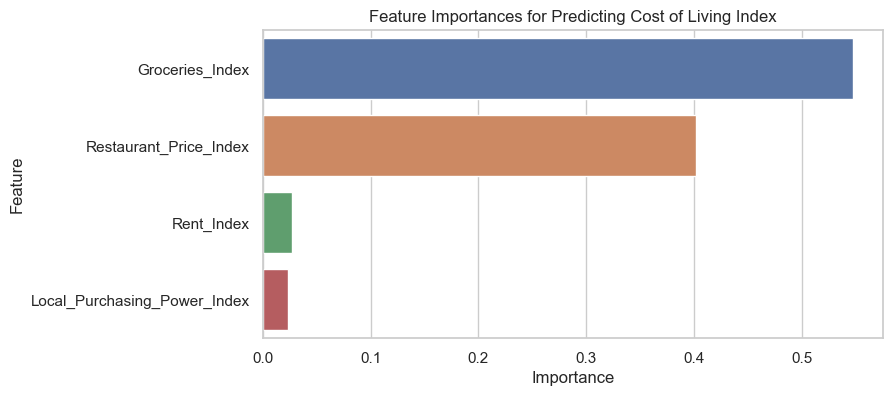

Random Forest RMSE: 5.907530969872269
Random Forest R² Score: 0.8868133236806658


In [54]:

# Define features (X) and target (y)
X = Cost_of_living[['Rent_Index', 'Groceries_Index', 'Restaurant_Price_Index', 'Local_Purchasing_Power_Index']]
y = Cost_of_living['Cost_of_Living_Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort feature importances
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)
plt.title('Feature Importances for Predicting Cost of Living Index')
plt.show()

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R² Score: {r2_rf}')


#### Random Forest Regression Performance

RMSE (Root Mean Squared Error): 5.91 indicates the average error between predicted and actual values. While the R² score of 0.887 suggests the model explains 88.7% of the variance, the RMSE shows that predictions could deviate by around 6 units on average from the actual values, which is reasonable depending on the range of the index.

R² Score: 0.887 suggests the model has captured most of the variability in the data, implying strong predictive power but with room for improvement in fine-tuning.

Groceries Index is the most significant feature for predicting the Cost of Living Index in both cases, heavily outweighing others like the Restaurant Price Index, Rent Index, and Local Purchasing Power Index.

Restaurant Price Index follows as the second most important factor, indicating that food and dining costs heavily influence the overall cost of living across countries.

Rent Index and Local Purchasing Power have a relatively lower importance suggesting that while they are factors, their individual influence on the cost of living might be less pronounced compared to groceries and dining costs.

Grocery prices and restaurant prices are the dominant drivers of the cost of living. Rent and local purchasing power have less influence but still contribute to the overall understanding of living expenses across countries. 

### Logistic Regression for Classifying Countries (High-Cost vs Low-Cost)
This example shows how you can classify countries into binary classes (e.g., high-cost vs low-cost) based on indices.

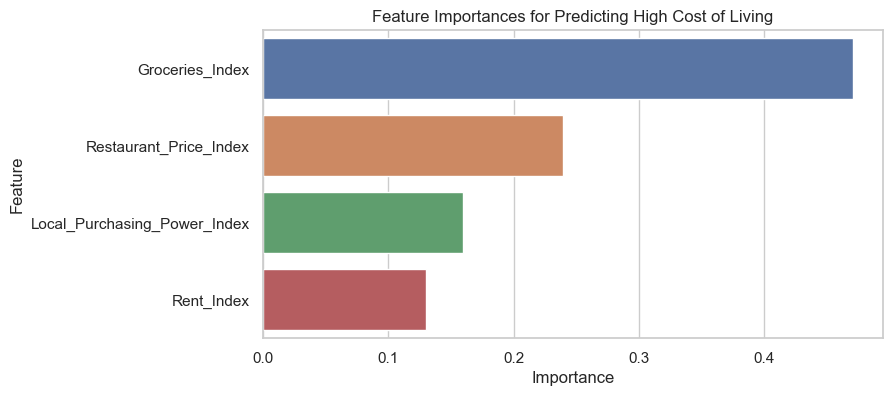

Random Forest Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [59]:

# Create a binary classification target
Cost_of_living['High_Cost'] = (Cost_of_living['Cost_of_Living_Index'] > 60).astype(int)  # Binary classification

# Define features (X) and target (y)
X = Cost_of_living[['Rent_Index', 'Groceries_Index', 'Restaurant_Price_Index', 'Local_Purchasing_Power_Index']]
y = Cost_of_living['High_Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort feature importances
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)
plt.title('Feature Importances for Predicting High Cost of Living')
plt.show()

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_rep)


#### Random Forest Classification Results

Accuracy: The Random Forest classifier achieved perfect accuracy (1.0) in categorizing the data with precision recall, and F1-scores also at 1.00. This suggests the model performed perfectly on the classification task, likely due to the small dataset size in this specific classification task (25 samples).
The model had 20 samples for class 0 and 5 samples for class 1, which may suggest some imbalance in the dataset.

### Cross-Validation: Performing cross-validation to check if the model’s performance is consistent across different subsets of the data.



In [60]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.92       1.         1.         0.95833333 0.95833333]
Mean cross-validation score: 0.9673333333333334


#### Cross-Validation Scores

The individual scores for each of the 5 folds are as follows:

0.92
1.00
1.00
0.958
0.958
These scores reflect the performance of the model in each fold of the 5-fold cross-validation. The scores are very high, with some folds achieving perfect accuracy (1.0) and the others scoring close to it.

#### Mean Cross-Validation Score

The mean cross-validation score is 0.967, which suggests that the model consistently performs well across different subsets of the data. This is a strong indicator of a well-performing model.

#### Interpretation

Consistency: The model's performance is consistent across different subsets, indicating that it is not heavily overfitting to one particular subset of data.

High Accuracy: A mean score of 0.967 suggests the model generalizes well, maintaining strong predictive power on unseen data.